<a href="https://colab.research.google.com/github/Dashnyam7/Scratch/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is decision tree?

A decision tree repeats conditional branching of data represented by attribute-value pairs {attribute 1: value 1, attribute 2: value 2, attribute 3: value 3, ..., attribute n: value n } . A tree-structured graph that can be assigned to a class

In [31]:
class  ScratchDecesionTreeClassifier ():
  def __init__(self, verbose=False):
      self.verbose = verbose
  def fit(self):
      pass      
  def predict(self):
      pass
  def _calc_gini(self):
      pass
  def _calc_ig(self):
      pass

Line 1: Class definition

Line 2: Constructor definition. I am passing the following 
as arguments: verbose (whether to output the learning process)

3rd line: verbose member variables

4th to 5th lines: Learning function. Since it is a template, we define a function with pass.

Lines 6-7: Prediction function.

Lines 8 and 9: A function to calculate the Gini impurity.

10th to 11th lines: A function to calculate the information gain.

# Find Gini impurity

Gini impurity is a measure of the randomness of the data given to the nodes of the decision tree.
The lower the number, the better, and the more mixed the classes, the higher the Gini impurity.
The Gini impurity is obtained by computing the Gini impurity of the node . The Gini impurity $I(t)$ for node $t$ is given by the following formula:

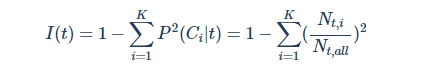

$t$ : node index

$i$ : class index

$K$ : number of classes

$C_i$ : i-th class

$P(C_i|t)$ : Proportion of $C_i$ at tth node

$N_{t,i}$ : Number of samples belonging to i-th class of t-th node

$N_{t,all}$ : total number of samples of tth node

Gini Impurity Calculation Examples:

Class 1: 15 samples, Class 2: 15 samples → Gini impurity 0.500

Class 1: 15 samples, Class 2: 15 samples, Class 3: 15 samples → Gini impurity 0.667

Class 1: 18 samples, Class 2: 12 samples → Gini impurity 0.480

Class 1: 30 samples, Class 2: 0 samples → Gini impurity 0.000

In [32]:
def _calc_gini(self,y):
    labels,counts = np.unique(y,return_counts=True)
    _gini = 0
    for label in labels:
        _gini += (counts[labels==label]/np.sum(counts))**2
    gini = 1 - _gini
    return gini

Line 1: Function definition.

Line 2: As an argument, the second line receives the variable y that stores the class (label) : the class (label) included in y and the number of the class (label) The

Line 3: Gini impurity (Σ in the above formula) is initialized as 0

Line 4: Looping with the class (label) obtained in Line 2 

Line 5: For the Gini impurity initialized with 0, (the number of applicable labels/total number) ^2 and adding

line 6: subtracting the calculated Gini impurity from 1 to calculate the final Gini impurity

line 7: returning the Gini impurity

# Find informarion gain

Information gain is a measure of the accuracy of node splitting. Since there are only two branches here, the branch destinations are called "left node/right node".

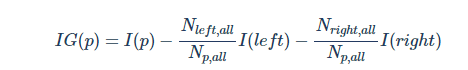

$p$ : index indicating the parent node

$left$ : index indicating left node

$right$ : index indicating right node

example:

Left node class 1: 10 samples

Left node class 2: 30 samples

Right node class 1: 20 samples

Right node class 2: 5 samples

→ Information gain 0.143

In [33]:
def _calc_ig(self,X,feature_index,y,threshold):
    labels_l = y[X[:,feature_index] < threshold]
    labels_r = y[X[:,feature_index] >= threshold]
    gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self.calc_gini(labels_l)
    gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self.calc_gini(labels_r)
    gain = self.calc_gini(y) -gain_l -gain_r
    return gain

Line 1: Function definition. As arguments, it receives the explanatory variable X, the index feature_index of which explanatory variable to use, the objective variable y, and the branching condition (threshold) threshold of the explanatory variable to be used (* The explanatory variable to be used is the feature_index-th variable of X)

Line 2: As labels_l, y is divided based on the explanatory variable threshold to be used (left node: $N_{left,all}$)

Line 3: As labels_r, y is divided based on the explanatory variable threshold to be used (right node: $N_{right,all}$)

Line 4: Calculation of $\frac{N_{left,all}}{N_{p,all}}I(left)$ part

5 lines: $\frac{N_{right,all}}{N_{p,all}}I(right)$ part of the calculation

Line 6: Calculation of overall information gain. Store the calculation result in gain

Line 7: Return gain as a return value

# Learning and estimation (fit, predict)

In [34]:
def fit(self, X, y):
    self.gain = 0
    for feature_index in range(X.shape[1]):
        self.thresholds = np.unique(X[:,feature_index])
        for threshold in self.thresholds:
            _gain = self.calc_gain(X,feature_index,y,threshold)
            if _gain > self.gain:
                self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                self.feature = feature_index
                self.threshold = threshold
                self.gain = _gain
                if self.verbose:
                    print('feature',self.feature,'threshold',self.threshold,'gain',self.gain)

Line 1: Function definition. Receiving explanatory variable X and objective variable y as arguments

Line 2: Initialization of information gain

Line 3: Loop with the number of explanatory variables and use the index of the explanatory variable in the loop

Line 4: Applicable Find the unique value of the explanatory variable

Line 5: Loop with the unique value found in Line 4 Line

Line 6: Pass various arguments to the function that seeks information gain and obtain information gain

Line 7: self.gain and 6 The information gain obtained in the row is compared, and if the information gain is greater than self.gain, the following processing is performed. Otherwise, return to loop processing.

Line 8: Output the value with the highest frequency of occurrence among the values ​​of the objective variable y that are classified into the left node.

Line 9: Classify into the right node. Among the values ​​of the objective variable y, the value with the highest frequency of appearance is the output of the right node

Line 10: Update the index of the adopted explanatory variable

Line 11: Update the threshold of the adopted explanatory variable

Line 12: Update information gain

Line 13: Check output settings

Line 14: Output of learning process

In [35]:
def predict(self, X):
    prediction = np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)
    return prediction

Line 1: Function definition. The second line that receives the explanatory variable X as an argument

Line 2: Branch using the "recorded index and threshold of the explanatory variable" described above, and finalize based on the "recorded left and right node output results" 3rd line calculating the expected output
Line 3: Returning the predicted value as a return value

# Implementation and visualization

In [36]:
import numpy as np
import collections
class ScratchDecesionTreeClassifier():
    """
    Scratch implementation of a decision tree classifier

    Parameters
    ----------
    verbose : bool
      True to print the learning process
    """

    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose

    def _calc_gini(self,y):
        labels,counts = np.unique(y,return_counts=True)
        _gini = 0
        for label in labels:
            _gini += (counts[labels==label]/np.sum(counts))**2
        gini = 1 - _gini
        return gini
    
    def _calc_ig(self,X,feature_index,y,threshold):
        labels_l = y[X[:,feature_index] < threshold]
        labels_r = y[X[:,feature_index] >= threshold]
        gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
        gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
        gain = self._calc_gini(y) -gain_l -gain_r
        return gain

    def fit(self, X, y):
        """
        Train a decision tree classifier
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples, )
            Correct value of training data
        """
        self.gain = 0
        for feature_index in range(X.shape[1]):
            self.thresholds = np.unique(X[:,feature_index])
            for threshold in self.thresholds:
                _gain = self._calc_ig(X,feature_index,y,threshold)
                if _gain > self.gain:
                    self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                    self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                    self.feature = feature_index
                    self.threshold = threshold
                    self.gain = _gain
                    if self.verbose:
                        print('feature',self.feature,'threshold',self.threshold,'gain',self.gain)

    def predict(self, X):
        """
        Estimate labels using a decision tree classifier
        """
        prediction = np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)
        return prediction

In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],test_size=0.3, random_state=0)

In [38]:
clf = ScratchDecesionTreeClassifier(verbose = True)
clf.fit(X_train,y_train)

feature 0 threshold 4.4 gain [0.00661608]
feature 0 threshold 4.5 gain [0.02023743]
feature 0 threshold 4.6 gain [0.0272504]
feature 0 threshold 4.7 gain [0.04914804]
feature 0 threshold 4.8 gain [0.05674825]
feature 0 threshold 4.9 gain [0.08051913]
feature 0 threshold 5.0 gain [0.08232605]
feature 0 threshold 5.1 gain [0.10829932]
feature 0 threshold 5.2 gain [0.16933821]
feature 0 threshold 5.3 gain [0.19172982]
feature 0 threshold 5.4 gain [0.20342287]
feature 0 threshold 5.5 gain [0.24063492]
feature 2 threshold 1.7 gain [0.28824661]
feature 2 threshold 3.0 gain [0.32949954]


In [39]:
train_prediction = clf.predict(X_train)

Visualization

In [40]:
def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()